# Tutorial: Reading Checkpoint File


This notebook will demonstrate how to read in a checkpoint file, and use the `rayleigh_diagnostics.py` and `spectral_utils.py` to analyze the file. 


In [77]:
# import the relevant utility
import spectral_utils

# import checkpoint reading function from Rayleigh
from rayleigh_diagnostics import checkpoint_read

# import other helpful things
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import chebyt


from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm,colors
plt.rcParams['image.cmap'] = 'seismic'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'

By default, Rayleigh outputs the checkpoint files in spectral form. Using the `spectral_utils.py` we can easily convert the spectral data into real data. Replace `checkpoint_file` with the path to your checkpoint file

In [78]:
#Read in the checkpoint data
checkpoint_file = 'Checkpoint/T'

#Specify nr and ntheta of the simulation
nr = 128
ntheta = 384

#Read in the checkpoint data
checkpoint = checkpoint_read(checkpoint_file, nr, ntheta)

In [79]:
#Specify a few variables based on ntheta
nphi = 2*ntheta
lmax = (nphi) / 3 - 1
dealias = ntheta/(lmax + 1)

#Initialize the Spectral Transform Class
SHT = spectral_utils.SHT(ntheta, spectral=False, dealias=dealias)


#### First we will perform the spectral transformation in $\theta$ and $\phi$

In [80]:
#Create an empty array
spec = np.zeros((ntheta, nphi, nr), dtype = "float64")

#Loop over radius 
for i in range(nr):
    
    #We specify .transpose() as ntheta and nphi are swapped in the to_physical function of the SHT class
    spec[:,:,i] = SHT.to_physical(checkpoint[:,:,i].transpose(), th_l_axis=0, phi_m_axis=1)
    

Next we will perform the Chebyshev transform in $r$. You can change `rmin` and `rmax` as according to your simulation

In [81]:
#First perform a chebyshev transform in radius to get to real space
rmin=5e10
rmax=6.83177e10


#Initialize the Chebyshev Class
cheb = spectral_utils.Chebyshev(nr, rmin=rmin, rmax=rmax)

#Perform the transformation in radius 
phys = cheb.to_physical(spec, axis = 2)


You now have real function, $f(\theta, \phi, r)$ from your checkpoint file. You can plot and see what it looks like for a particular grid point in radius. `r=0` corresponds to the top of the shell. 

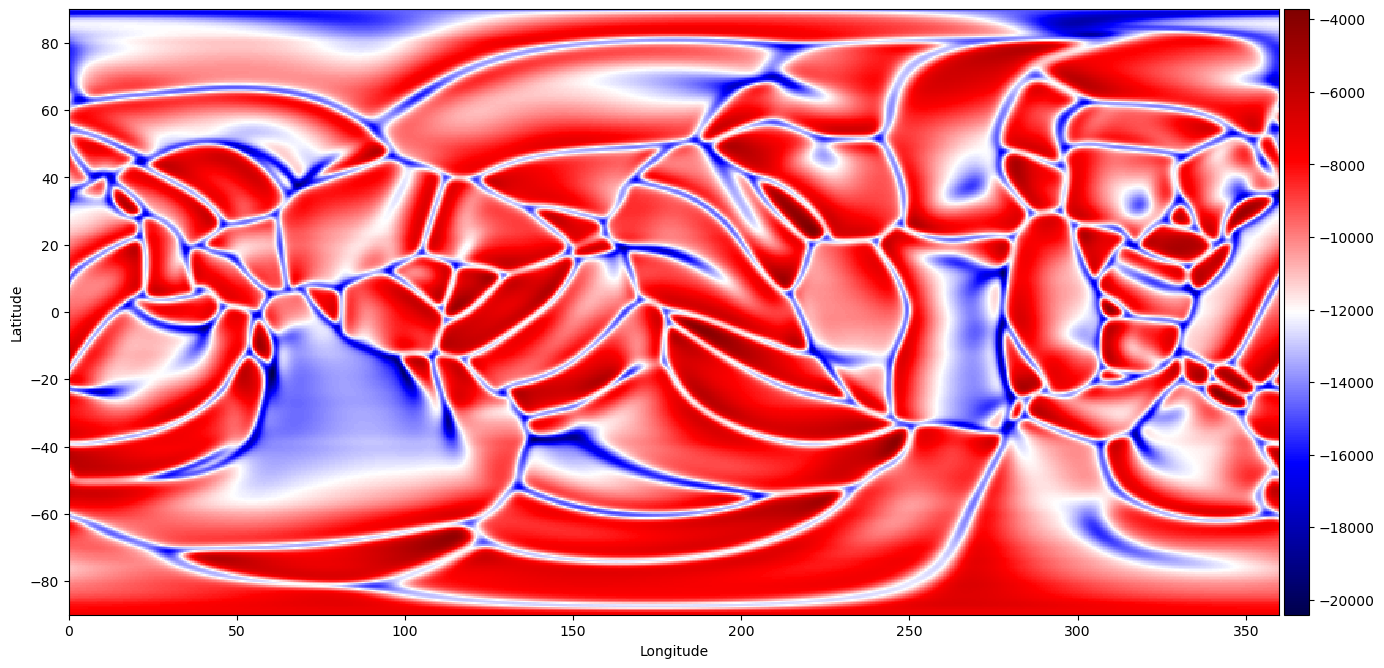

In [82]:
#Specify where in the shell to view our function
r = 10

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

#Show the image
p0 = ax.imshow(phys[:,:,r], extent=[0, 360, -90, 90])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.05)
fig.colorbar(p0, cax = cax)
